In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("dataset/mushrooms.csv")
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [17]:
mappings = list()
encoder = LabelEncoder()

for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)
    print(mappings)

[{0: 'e', 1: 'p'}]
[{0: 'e', 1: 'p'}, {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'}]
[{0: 'e', 1: 'p'}, {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'}, {0: 'f', 1: 'g', 2: 's', 3: 'y'}]
[{0: 'e', 1: 'p'}, {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'}, {0: 'f', 1: 'g', 2: 's', 3: 'y'}, {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'p', 6: 'r', 7: 'u', 8: 'w', 9: 'y'}]
[{0: 'e', 1: 'p'}, {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'}, {0: 'f', 1: 'g', 2: 's', 3: 'y'}, {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'p', 6: 'r', 7: 'u', 8: 'w', 9: 'y'}, {0: 'f', 1: 't'}]
[{0: 'e', 1: 'p'}, {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'}, {0: 'f', 1: 'g', 2: 's', 3: 'y'}, {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'p', 6: 'r', 7: 'u', 8: 'w', 9: 'y'}, {0: 'f', 1: 't'}, {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'}]
[{0: 'e', 1: 'p'}, {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'}, {0: 'f', 1: 'g', 2: 's', 3: 'y'}, {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 

In [18]:
y = data['class']
X = data.drop('class', axis=1)
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(X)

      cap-shape  cap-surface  cap-color   bruises      odor  gill-attachment  \
0      1.029712     0.140128  -0.198250  1.185917  0.881938         0.162896   
1      1.029712     0.140128   1.765874  1.185917 -1.970316         0.162896   
2     -2.087047     0.140128   1.373049  1.185917 -0.544189         0.162896   
3      1.029712     0.953270   1.373049  1.185917  0.881938         0.162896   
4      1.029712     0.140128  -0.591075 -0.843230  0.406562         0.162896   
...         ...          ...        ...       ...       ...              ...   
8119  -0.216992     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8120   1.029712     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8121  -0.840343     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8122  -0.216992     0.953270  -0.198250 -0.843230  1.832689         0.162896   
8123   1.029712     0.140128  -0.198250 -0.843230  0.406562        -6.138869   

      gill-spacing  gill-size  gill-col

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8, random_state=2)
dt.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=2)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

np.sum(y) / len(y)

0.48202855736090594

In [21]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [25]:
from sklearn.metrics import accuracy_score

y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Logistic Regression     : {log_model.score(X_test, y_test)}")
print(f"Support Vector Machine  : {svm_model.score(X_test, y_test)}")
print(f"Neural Network          : {nn_model.score(X_test, y_test)}")
print("Metrics Acc             : {:.2f}".format(acc))

Logistic Regression     : 0.9538461538461539
Support Vector Machine  : 1.0
Neural Network          : 1.0
Metrics Acc             : 1.00


<AxesSubplot:>

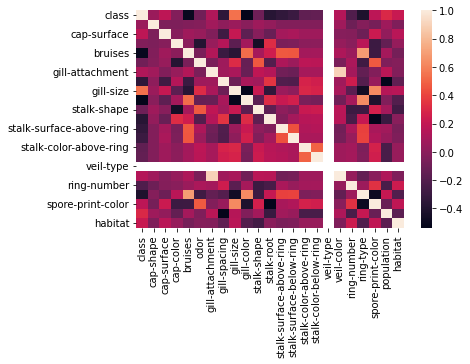

In [26]:
X_test.shape

corr = data.corr()

sns.heatmap(corr)